# **1. 결정 트리**

- 3주차 branch에 있는 `car_evaluation.csv`를 다운받은 후 실습을 진행해 주세요.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **1-a. 'car_evaluation.csv'를 불러와 df에 저장해 주세요.**

In [ ]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("C:/Users/Flex/Documents/Euron/car_evaluation.csv")

## **1-b. df의 상위 5개 행을 확인해 주세요.**

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-c. ```info()```를 통해 데이터 정보를 확인해 주세요.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## **1-d. 컬럼명이 적절해 보이지 않네요. 컬럼명을 알맞게 변경해 주세요.**


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

In [6]:
# 데이터 재확인

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-e. 범주형 변수에 대해 Label Encoding을 수행해 주세요.**
- Hint: 파머완 p.118, 121~122

In [7]:
# 범주형 변수 리스트
from sklearn.preprocessing import LabelEncoder

cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# LabelEncoder 객체 생성

encoder = LabelEncoder()

# 각 범주형 변수에 대해 레이블 인코딩 수행

df['buying'] = encoder.fit_transform(df['buying'])
df['maint'] = encoder.fit_transform(df['maint'])
df['doors'] = encoder.fit_transform(df['doors'])
df['persons'] = encoder.fit_transform(df['persons'])
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['safety'] = encoder.fit_transform(df['safety'])

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,unacc
1,3,3,0,0,2,0,unacc
2,3,3,0,0,1,1,unacc
3,3,3,0,0,1,2,unacc
4,3,3,0,0,1,0,unacc


## **1-f. Feature(X)와 Target(y)를 분리해 주세요.**
- target(y) 변수: class

In [9]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df['class']

## **1-g. ```train_test_split()```을 사용하여 훈련 세트와 테스트 세트로 나눠주세요.**
(random_state = 42, train: test = 8:2)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
       buying  maint  doors  persons  lug_boot  safety
107        3      0      0        0         2       1
900        2      3      1        1         2       2
1708       1      1      3        0         0       0
705        0      2      2        0         1       2
678        0      2      1        0         1       2
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         0       1
1294       2      1      3        2         0       0
860        0      1      3        2         0       1
1459       1      0      2        0         2       0
1126       2      2      1        2         2       0

[1381 rows x 6 columns]
X_test:
       buying  maint  doors  persons  lug_boot  safety
599        0      0      2        0         0       1
932        2      3      2        1         0       1
628        0      0      3        0         0       0
1497       1      0      3        1         1       2
1262       2      1      2        2   

## **1-h. ```DecisionTreeClassifier```를 사용해 훈련 데이터를 fit 한 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
#DecisionTreeClassifer 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 42)

#훈련 데이터 fit
dt_clf.fit(X_train, y_train)

#예측 수행
pred = dt_clf.predict(X_test)

#예측 정확도 구하기

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9711


## **1-i. GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.**
- Hint: 파머완 p.113, 207


```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```



In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
#파라미터들을 딕셔너리 형태로 설정
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

#DecisionTreeClassifier 객체 형성
dtree = DecisionTreeClassifier()

#param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid = params, cv= 3, refit = True)

#df 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#최적 하이퍼 파라미터 조합 찾기
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9667


## **1-j. 최적화 된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [15]:
# 최적 파라미터로 DecisionTreeClassifier 모델을 생성
best_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=2)

#학습 수행
best_dtree.fit(X_train, y_train)

#예측 수행
pred = best_dtree.predict(X_test)

#예측 정확도 구하기

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred))) #이전의 정확도보다 약 0.003 오른 것을 확인

예측 정확도: 0.9740


# **2. 서포트 벡터 머신**

## **2-a. split된 자동차 평가 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요.**
(C = 10)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
# 선형 SVM 모델 생성
svm_model = SVC(kernel='linear', C= 10)

# 데이터를 사용하여 모델 학습
svm_model.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = svm_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test,pred)

# 정확도 출력
print("선형 SVM 모델의 정확도: {0:.4f}" .format(accuracy))

선형 SVM 모델의 정확도: 0.7139


## **2-b. 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.**
(cv = 5)

In [18]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [19]:
# 탐색할 C 값 리스트
param = {'C': [0.1, 0.5, 1, 5, 10, 40]}

# GridSearchCV를 사용하여 최적의 C 값 찾기 
grid_search = GridSearchCV(svm_model, param, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 C 값과 최고 점수 출력
best_estimator_ = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("최적의 C 값:", best_estimator_)
print("최고 점수: {0:.4f}" .format(best_score))  #C= 10일 때보다 정확도가 약 0.016 증가

최적의 C 값: 5
최고 점수: 0.7299


## **2-c. 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.**
Hint: `best_estimator_`

In [20]:
# 선형 SVM 모델 생성
svm_model = SVC(kernel='linear', C=best_estimator_)

# 데이터를 사용하여 모델 학습
svm_model.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = svm_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test,pred)

# 정확도 출력
print("선형 SVM 모델의 정확도: {0:.4f}" .format(accuracy))

선형 SVM 모델의 정확도: 0.7081


## **2-d. GridSearchCV를 이용하여 최적의 `gamma`, `C` 값을 찾아 최적 가우시안 SVM 모델을 만들고, fit 하세요.**
(가우시안 svm: kernel = 'rbf')

In [21]:
params = {'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [22]:
# 탐색할 gamma와 C 값의 리스트
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# 가우시안 SVM 모델 생성 (kernel='rbf')
svm_model = SVC(kernel='rbf')

# GridSearchCV를 사용하여 최적의 gamma와 C 값을 찾기 
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 gamma와 C 값을 가져오기
best_gamma = grid_search.best_params_['gamma']
best_estimator_ = grid_search.best_params_['C']

# 최적의 하이퍼파라미터로 모델 생성 및 학습
best_svm_model = SVC(kernel='rbf', C=best_estimator_, gamma=best_gamma)
best_svm_model.fit(X_train, y_train)


print("최적의 C 값:", best_estimator_)
print("최적의 gamma 값:", best_gamma)
print("최고 점수: {0:.4f}" .format(best_score))

최적의 C 값: 100
최적의 gamma 값: 0.1
최고 점수: 0.7299


# **3. 앙상블**

## **3-a. breast_cancer 데이터셋을 ```load()``` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠주세요.**
(test_size = 0.2, random_state = 42)




In [26]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [28]:
#데이터셋 불러오기
cancer = load_breast_cancer()

# 독립 변수(X)와 종속 변수(y) 분리
X = cancer.data
y = cancer.target

#훈련세트와 테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
 [[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
X_test:
 [[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.422e+01 2.785e+01 9.255e+01 ... 8.219e-02 1.890e-01 7.796e-02]
 [2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]]
y_train:
 [1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 

## **3-b. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
# 로지스틱 회귀 모델 생성 및 학습
logistic_regression = LogisticRegression(solver="liblinear")
logistic_regression.fit(X_train, y_train)

# 로지스틱 회귀 모델 예측 및 평가
pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("로지스틱 회귀 정확도:{0:.4f}".format(accuracy_lr))

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

# KNN 모델 예측 및 평가
pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)
print("KNN 정확도:{0:.4f}".format(accuracy_knn))

# 결정 트리 모델 생성 및 학습
decision_tree = DecisionTreeClassifier(random_state=12)
decision_tree.fit(X_train, y_train)

# 결정 트리 모델 예측 및 평가
pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred_dt)
print("결정 트리 정확도:{0:.4f}".format(accuracy_dt))

로지스틱 회귀 정확도:0.9561
KNN 정확도:0.9649
결정 트리 정확도:0.9386


## **3-c. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [40]:
from sklearn.ensemble import VotingClassifier

#개별 모델 생성
lr_clf = LogisticRegression(solver = "liblinear")
dt_clf = DecisionTreeClassifier(random_state = 12)

# 하드 보팅 분류기 생성
voting_classifier = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf)], voting='hard')

# 하드 보팅 분류기 학습
voting_classifier.fit(X_train, y_train)

# 하드 보팅 분류기 예측
pred_hardvoting = voting_classifier.predict(X_test)

# 하드 보팅 분류기 정확도 평가
accuracy_voting = accuracy_score(y_test, pred_hardvoting)
print("하드 보팅 분류기 정확도: {0:.4f}" .format(accuracy_voting))

하드 보팅 분류기 정확도: 0.9298


## **3-d. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [41]:
from sklearn.ensemble import VotingClassifier

# 개별 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=16)
dt_clf = DecisionTreeClassifier(random_state=12)

# 소프트 보팅 분류기 생성
voting_classifier = VotingClassifier(estimators=[('knn', knn_clf), ('dt', dt_clf)], voting='soft')

# 소프트 보팅 분류기 학습
voting_classifier.fit(X_train, y_train)

# 소프트 보팅 분류기 예측
pred_softvoting = voting_classifier.predict(X_test)

# 소프트 보팅 분류기 정확도 평가
accuracy_voting = accuracy_score(y_test, pred_softvoting)
print("소프트 보팅 분류기 정확도: {0:.4f}".format(accuracy_voting))


소프트 보팅 분류기 정확도: 0.9386


# **4. 랜덤 포레스트**

## **4-a. RandomForestClassifier를 이용하여 훈련 데이터를 fit한 후, 테스트 셋으로 예측 정확도를 구하세요.**
(random_state = 42, max_depth = 8)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Random Forest 모델 생성
rf_clf = RandomForestClassifier(random_state=42, max_depth=8)

# 훈련 데이터로 모델 학습
rf_clf.fit(X_train, y_train)

# 테스트 데이터로 예측
pred_rf = rf_clf.predict(X_test)

# 정확도 계산
accuracy_rf = accuracy_score(y_test, pred_rf)

# 정확도 출력
print("Random Forest 모델 정확도:{0:.4f}" .format(accuracy_rf))

Random Forest 모델 정확도:0.9649


## **4-b. GridSearchCV를 사용하여 최적의 하이퍼 파라미터 조합을 찾으세요.**
(cv = 2, n_jobs = -1)

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [1, 2, 4,8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=42, max_depth=8)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)

#GridSearchCV 학습 수행
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9472


## **4-c. 위에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 정확도를 측정해 보세요.**


In [48]:
# 랜덤 포레스트 모델 생성 및 하이퍼파라미터 설정
rf_clf = RandomForestClassifier(
    max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, random_state=42
)

# 훈련 데이터로 모델 학습
rf_clf.fit(X_train, y_train)

# 테스트 데이터로 예측
pred_rf = rf_clf.predict(X_test)

# 정확도 계산
accuracy_rf = accuracy_score(y_test, pred_rf)

# 정확도 출력
print("Random Forest 모델 정확도: {0:.4f}".format(accuracy_rf))

Random Forest 모델 정확도: 0.9649


## **4-d. ```feature_importances_``` 속성을 이용하여 전체 feature의 피처 주요도를 막대 그래프로 시각화 해보세요.**
(index = cancer.feature_names)  
Hint: 파머완 p.210

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

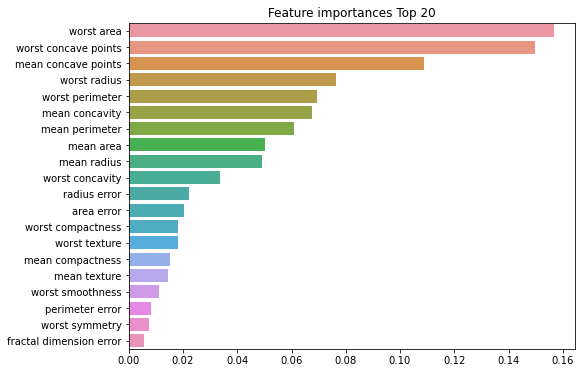

In [52]:
# 특성 중요도 추출
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

#시각화하기
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()